In [20]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [21]:
# vectors = pd.read_feather('data/1m.ftr')
vectors = pd.read_csv('data/rust_vectors.csv')
corr = vectors.corr()
vectors.shape

(5203319, 45)

In [22]:
vectors.isnull().values.any()

False

In [23]:
vectors

,Special Gasoline,Special Diesel,Lubricant,Diesel Auto Clean,Gasoline,Several,Filters,Additives And Fluids,Ethanol,Cigarettes,...,Toys,Covers,Pastas,Popcorn,Sweet Coconut James,Batteries,Mate Herb,Perfumery,Chas Juice Cafe In Powder,Special Diesel S10
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203314,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5203315,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5203316,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5203317,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot Correlation Matrix 

In [24]:
def triangle_map(corrmat):
    fig, ax = plt.subplots(figsize=(12,12))
    df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))
    sns.heatmap(df_lt, cmap='binary', square=True, linewidths=0.2)
    plt.show()

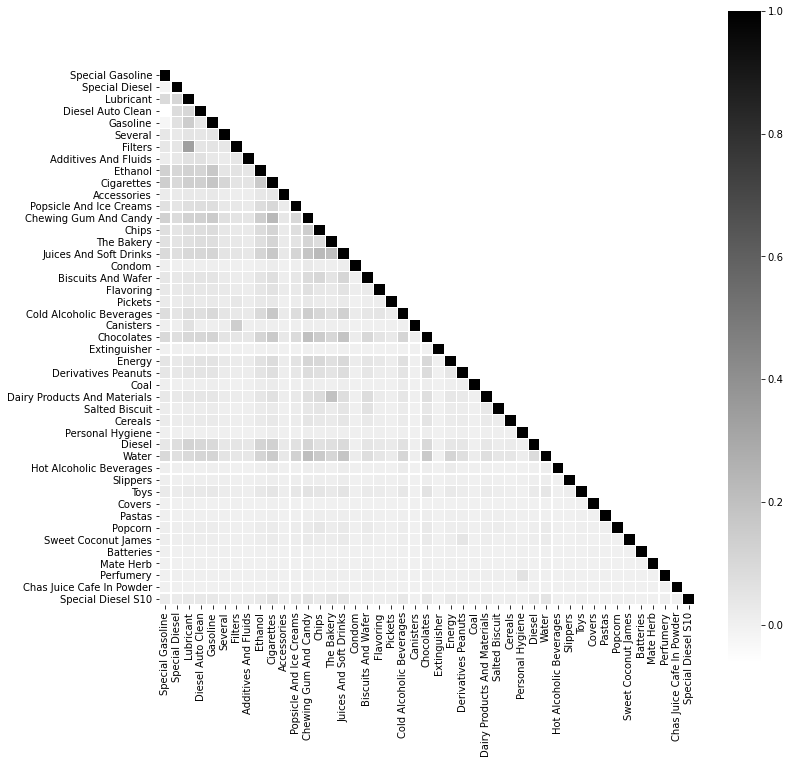

In [25]:
triangle_map(corr)

### Make Graph

In [26]:
# Vectorized distance function to transform matrix
def dfunc(cell):
        return np.sqrt(2 * (1 - cell))

In [27]:
# Generates an encoded dictionary mapping each 
# node to an encoded value for each product
def make_labels(vec_df, limit=None):
    # Get columns and restrict if specified
    cols = vec_df.columns
    cols = cols[:limit] if limit else cols
    
    # Encode each label
    le = LabelEncoder()
    encoded = le.fit_transform(cols)
    
    # Generate a dict mapping each node to a label
    labels = {i:encoded[i] for i in range(len(cols))}
    
    # Make a legend for products and encodings
    legend = list(zip(encoded, vectors.columns))
    # Sort the legend for ease of use
    legend.sort()
    legend = dict(legend)
    
    # Generate a dict mapping each node to a label
#     labels = {}
#     for i in range(len(cols)):
#         labels[i] = encoded[i]
    
    return labels, legend

In [28]:
# Draw a graph with the specified parameters
def draw(G, pos, ax, node_color='c', node_size=400, width=1, edge_color='0.25', font_size=15):
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_color, node_size=node_size)
    nx.draw_networkx_edges(G, pos, ax=ax, width=width, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=font_size)

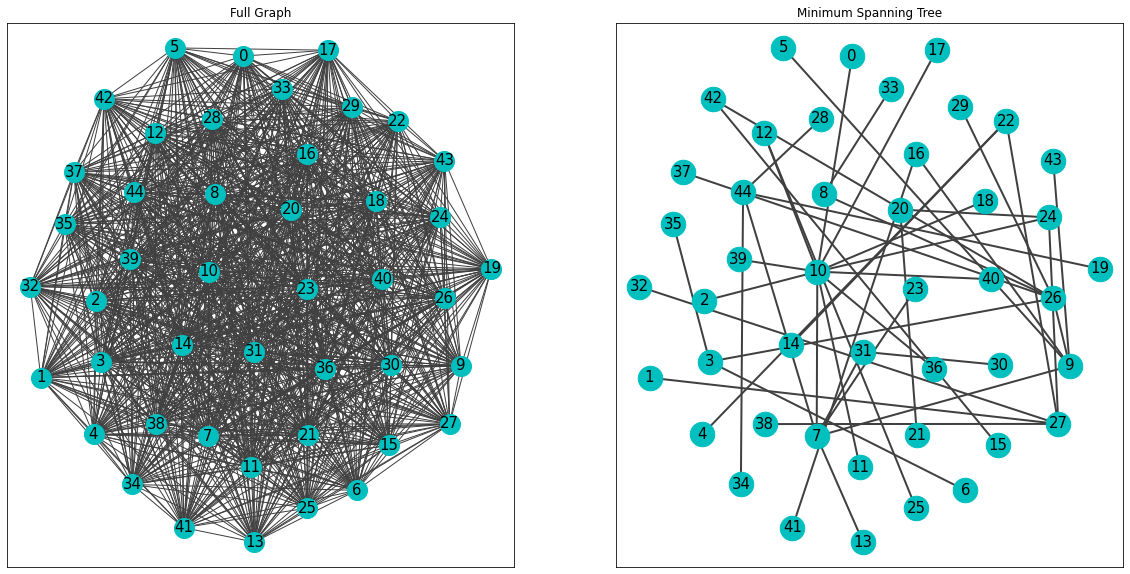

{0: 'Accessories',
 1: 'Additives And Fluids',
 2: 'Batteries',
 3: 'Biscuits And Wafer',
 4: 'Canisters',
 5: 'Cereals',
 6: 'Chas Juice Cafe In Powder',
 7: 'Chewing Gum And Candy',
 8: 'Chips',
 9: 'Chocolates',
 10: 'Cigarettes',
 11: 'Coal',
 12: 'Cold Alcoholic Beverages',
 13: 'Condom',
 14: 'Covers',
 15: 'Dairy Products And Materials',
 16: 'Derivatives Peanuts',
 17: 'Diesel',
 18: 'Diesel Auto Clean',
 19: 'Energy',
 20: 'Ethanol',
 21: 'Extinguisher',
 22: 'Filters',
 23: 'Flavoring',
 24: 'Gasoline',
 25: 'Hot Alcoholic Beverages',
 26: 'Juices And Soft Drinks',
 27: 'Lubricant',
 28: 'Mate Herb',
 29: 'Pastas',
 30: 'Perfumery',
 31: 'Personal Hygiene',
 32: 'Pickets',
 33: 'Popcorn',
 34: 'Popsicle And Ice Creams',
 35: 'Salted Biscuit',
 36: 'Several',
 37: 'Slippers',
 38: 'Special Diesel',
 39: 'Special Diesel S10',
 40: 'Special Gasoline',
 41: 'Sweet Coconut James',
 42: 'The Bakery',
 43: 'Toys',
 44: 'Water'}

In [29]:
# Global variables
limit = None
labels, legend = make_labels(vectors, limit=limit)
use_distance = True
# Make graphs 
corrmat = np.array(vectors.corr())
corrmat = np.absolute(corrmat)
corrmat = dfunc(corrmat) if use_distance else corrmat
corrmat = corrmat[:limit, :limit] if limit else corrmat
G = nx.from_numpy_matrix(corrmat) # Graph
MST = nx.minimum_spanning_tree(G) # Minimum Spanning Tree

# Uniform layout for all plots to follow
pos = nx.spring_layout(G)

# Axes to draw on
nrows, ncols = 1,2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 10*nrows))

# Draw full graph
draw(G, pos, ax[0])
ax[0].set_title('Full Graph')

# Draw MST
draw(MST, pos, ax[1], node_size=600, width=2)
ax[1].set_title('Minimum Spanning Tree')

# Show
plt.show()

# Use to map numbers to products
legend

In [30]:
# Sort the edges by shortest values (i.e. closest relations)
E = [(a,b,c['weight']) for (a,b,c) in MST.edges(data=True)]
E = sorted(E, key=lambda x: x[2], reverse=False)

In [31]:
for edge in E:
    print(f'{legend[edge[0]]} -> {legend[edge[1]]}: {edge[2]:.8f}')

Batteries -> Chas Juice Cafe In Powder: 1.15329696
Chocolates -> Cold Alcoholic Beverages: 1.24075217
Condom -> Dairy Products And Materials: 1.24559884
Covers -> Dairy Products And Materials: 1.25953533
Cold Alcoholic Beverages -> Pickets: 1.26242308
Cold Alcoholic Beverages -> Filters: 1.26710819
Covers -> Lubricant: 1.27094356
Dairy Products And Materials -> Filters: 1.27845058
Canisters -> Chocolates: 1.28525564
Canisters -> Chips: 1.29029897
Chocolates -> Ethanol: 1.29073528
Batteries -> Canisters: 1.30731113
Accessories -> Chocolates: 1.31029521
Chas Juice Cafe In Powder -> Extinguisher: 1.31042582
Biscuits And Wafer -> Chocolates: 1.31432767
Chocolates -> Personal Hygiene: 1.31898343
Coal -> Pickets: 1.32109270
Gasoline -> Pickets: 1.33101153
Dairy Products And Materials -> Diesel: 1.33426441
Additives And Fluids -> Batteries: 1.33466378
Cereals -> Chocolates: 1.33550236
Filters -> Hot Alcoholic Beverages: 1.35308834
Cold Alcoholic Beverages -> Diesel Auto Clean: 1.36533868
Batt

In [12]:
r = np.arange(-1, 1, 0.1)
[round(x, 2) for x in r]

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 -0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9]

In [13]:
dfunc(r)

array([2.        , 1.94935887, 1.8973666 , 1.84390889, 1.78885438,
       1.73205081, 1.67332005, 1.61245155, 1.54919334, 1.4832397 ,
       1.41421356, 1.34164079, 1.26491106, 1.18321596, 1.09544512,
       1.        , 0.89442719, 0.77459667, 0.63245553, 0.4472136 ])